# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

## Objetivo Principal:

Prever a renda de clientes com precisão para liberação de crédito seguro, minimizando o risco de inadimplência.

## Problema de Negócio:

Empresas precisam estimar a renda real para definir limites de empréstimo sem aumentar o default.

## Impacto:

Superestimar → Aumento de inadimplência.

Subestimar → Perda de receita com clientes bons.

## Stakeholders:

Área de Risco (prioriza inadimplência baixa).

Área de Crédito (quer maximizar aprovações seguras).

## Critérios de Sucesso:

RMSE da previsão de renda ≤ R$ 500.

Redução de inadimplência em pelo menos 10% pós-implementação.

## Tradução para Dados:

Tarefa: Regressão (prever renda como valor contínuo).

Dados Chave: tempo_emprego, educacao, tipo_renda, posse_de_imovel.


## Etapa 2 Crisp-DM: Entendimento dos dados

| Variável             | Relevância para o Modelo                                           | 
| ---------------------| ------------------------------------------------                   |
|tempo_emprego	       |Alto impacto (correlação positiva comum com renda)                  |
|educacao	           |Escolaridade maior tende a aumentar renda                           |
|posse_de_imovel       |Indica estabilidade financeira (pode ser proxy de renda)            |
|idade	               |Curva de renda geralmente sobe até certa idade e depois estabiliza  |
|qt_pessoas_residencia |Pode exigir criação de renda per capita (renda / qt_pessoas)        |


### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência da observação                   | Data (string)|
| id_cliente              |  Identificador único do cliente                     | Numérica inteira|
| sexo                    |  Sexo do cliente (F = Feminino, M = Masculino)      | Categórica nominal|
| posse_de_veiculo        |  Cliente possui veículo próprio (True ou False)     | Binária (bool)|
| posse_de_imovel         |  Cliente possui imóvel próprio (True ou False)      | Binária (bool)|
| qtd_filhos              |  Número de filhos declarados                        | Numérica discreta|
| tipo_renda              |  Categoria da fonte de renda (ex: Assalariado, Servidor público, etc.) | Categórica nominal|
| educacao                |  Nível educacional (ex: Secundário, Superior completo, etc.)           | Categórica ordinal|
| estado_civil            |  Estado civil do cliente (Casado, Solteiro, etc.)   | Categórica nominal|
| tipo_residencia         |  Tipo de residência (Casa, Aluguel, etc.)           | Categórica nominal|
| idade                   |  Idade do cliente em anos                           | Numérica contínua|
| tempo_emprego           |  Tempo de emprego atual em anos                     | Numérica contínua|
| qt_pessoas_residencia   |  Quantidade de pessoas morando com o cliente        | Numérica contínua|
| renda                   |  Renda mensal declarada (variável alvo)             | Numérica contínua|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
dados = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
dados.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(dados, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 66.27it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

tempo_emprego com muitos valores ausentes, 17%.

renda é uma vará+iável que deve ser usada para geração de previsão.




### Entendimento dos dados - Bivariadas




| Variável                | Relação com Renda                                                                   |
| ----------------------- | ----------------------------------------------------------------------------------- |
| tempo_emprego         | Relação positiva com a renda.                                       |
| educacao              | Quanto maior o nível educacional, maior a renda média (ordem coerente).             |
| tipo_renda            | Empresário tem renda média maior do que assalariado ou servidor.              |
| idade                 | Renda aumenta até cerca de 50 anos e estabiliza.                                    |
| qt_pessoas_residencia | Pouca correlação direta com renda — pode ser usada para criar renda per capita.     |
| estado_civil          | `Casados` têm renda ligeiramente maior em média.                                    |



## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [7]:
dados.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [8]:
dados.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [9]:
dados_sem_na = dados.dropna(axis=0)
dados_sem_na.head(2)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


In [10]:
dados_sem_na.drop_duplicates()
dados_sem_na.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [11]:
df_tipos = pd.DataFrame({
    'Variável': dados_sem_na.columns,
    'Tipo de Dado': dados_sem_na.dtypes.values
})

df_tipos

,Variável,Tipo de Dado
0,Unnamed: 0,int64
1,data_ref,object
2,id_cliente,int64
3,sexo,object
4,posse_de_veiculo,bool
5,posse_de_imovel,bool
6,qtd_filhos,int64
7,tipo_renda,object
8,educacao,object
9,estado_civil,object


In [12]:
qtd_categorias = []

for coluna in dados.columns:
    qtd_categorias.append(dados_sem_na[coluna].nunique())

df_tipos['qtd_categorias'] = qtd_categorias

df_tipos


,Variável,Tipo de Dado,qtd_categorias
0,Unnamed: 0,int64,12427
1,data_ref,object,15
2,id_cliente,int64,8161
3,sexo,object,2
4,posse_de_veiculo,bool,2
5,posse_de_imovel,bool,2
6,qtd_filhos,int64,8
7,tipo_renda,object,5
8,educacao,object,5
9,estado_civil,object,5


In [13]:
colunas_modelo = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
    'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia',
    'idade', 'tempo_emprego', 'qt_pessoas_residencia'
]

X = dados_sem_na[colunas_modelo]
y = dados_sem_na['renda']


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Vamos seguir com o modelo de árvode decisão

### Rodando o modelo


In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
cat_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

In [16]:
pipeline_arvore = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=5, random_state=42))  # max_depth ajustável
])

In [17]:
pipeline_arvore.fit(X_treino, y_treino)

,steps,"[('preprocessamento', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
y_pred = pipeline_arvore.predict(X_teste)

rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
r2 = r2_score(y_teste, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.3f}')

RMSE: 6029.21
R²: 0.372


In [19]:
dados_sem_na.loc[:, 'log_renda'] = np.log1p(dados_sem_na['renda'])

X = dados_sem_na[colunas_modelo]
y = dados_sem_na['log_renda']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_log = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=5, random_state=42))
])

pipeline_log.fit(X_treino, y_treino)

y_pred_log = pipeline_log.predict(X_teste)
rmse_log = np.sqrt(mean_squared_error(y_teste, y_pred_log))
r2_log = r2_score(y_teste, y_pred_log)

print(f'Usando log_renda como alvo:')
print(f'RMSE (log): {rmse_log:.4f}')
print(f'R² (log): {r2_log:.3f}')

Usando log_renda como alvo:
RMSE (log): 0.7147
R² (log): 0.372


C:\Users\marci\AppData\Local\Temp\ipykernel_11152\1165378685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_na.loc[:, 'log_renda'] = np.log1p(dados_sem_na['renda'])


In [20]:
pipeline_log_profunda = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=10, random_state=42))
])

pipeline_log_profunda.fit(X_treino, y_treino)

y_pred_log_10 = pipeline_log_profunda.predict(X_teste)
rmse_10 = np.sqrt(mean_squared_error(y_teste, y_pred_log_10))
r2_10 = r2_score(y_teste, y_pred_log_10)

print(f'Com max_depth=10:')
print(f'RMSE (log): {rmse_10:.4f}')
print(f'R² (log): {r2_10:.3f}')

Com max_depth=10:
RMSE (log): 0.7282
R² (log): 0.348


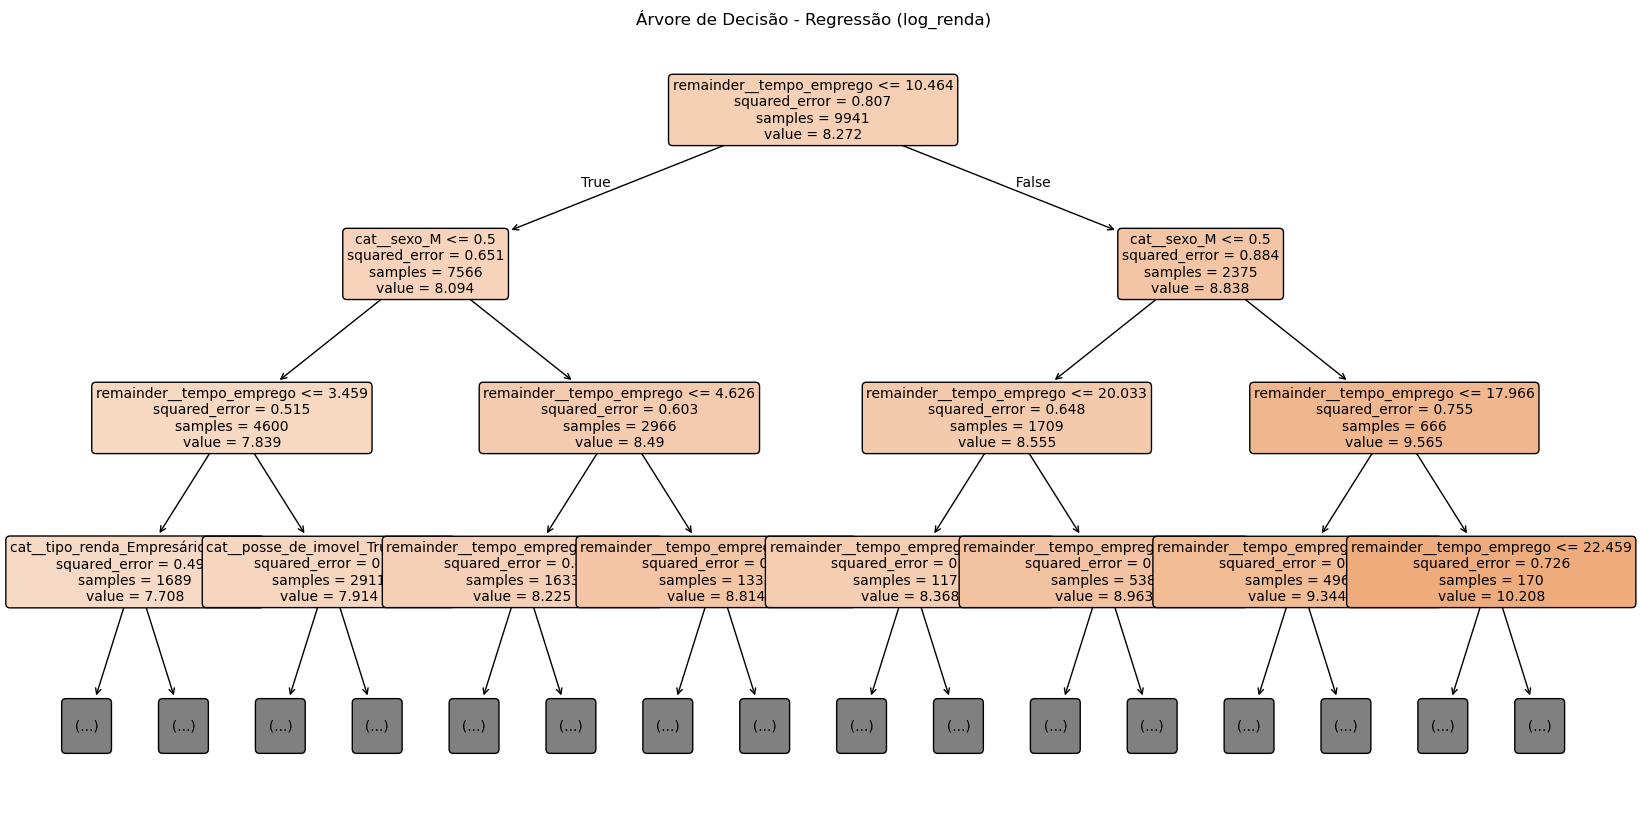

In [21]:
modelo_treinado = pipeline_log_profunda.named_steps['modelo']

feature_names_encoded = pipeline_log_profunda.named_steps['preprocessamento'].get_feature_names_out()

plt.figure(figsize=(20, 10))
plot_tree(modelo_treinado,
          feature_names=feature_names_encoded,
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.title("Árvore de Decisão - Regressão (log_renda)")
plt.show()

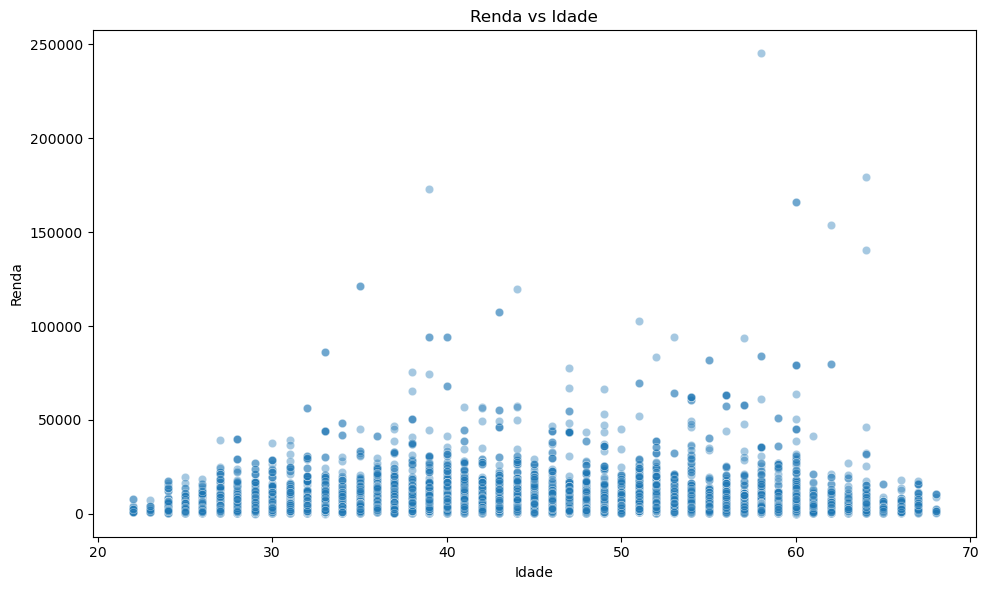

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='idade', y='renda', alpha=0.4)
plt.title("Renda vs Idade")
plt.xlabel("Idade")
plt.ylabel("Renda")
plt.tight_layout()
plt.show()

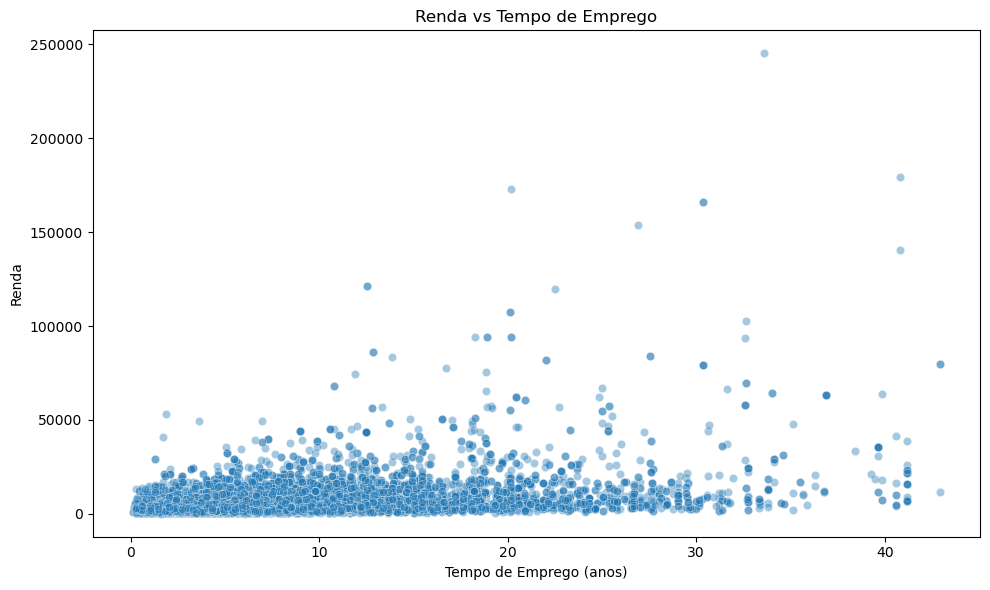

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='tempo_emprego', y='renda', alpha=0.4)
plt.title("Renda vs Tempo de Emprego")
plt.xlabel("Tempo de Emprego (anos)")
plt.ylabel("Renda")
plt.tight_layout()
plt.show()

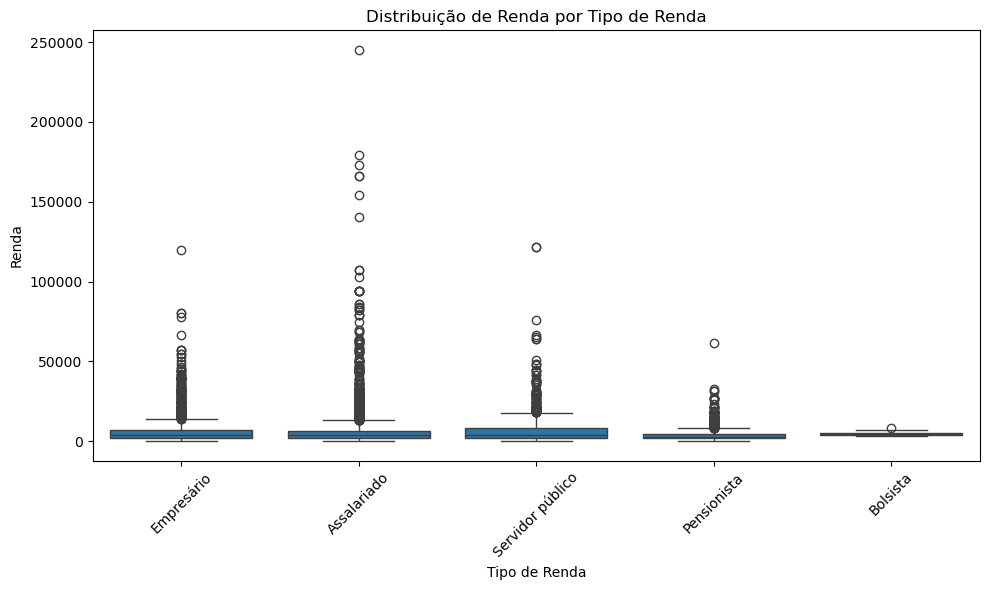

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='tipo_renda', y='renda')
plt.title("Distribuição de Renda por Tipo de Renda")
plt.xlabel("Tipo de Renda")
plt.ylabel("Renda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


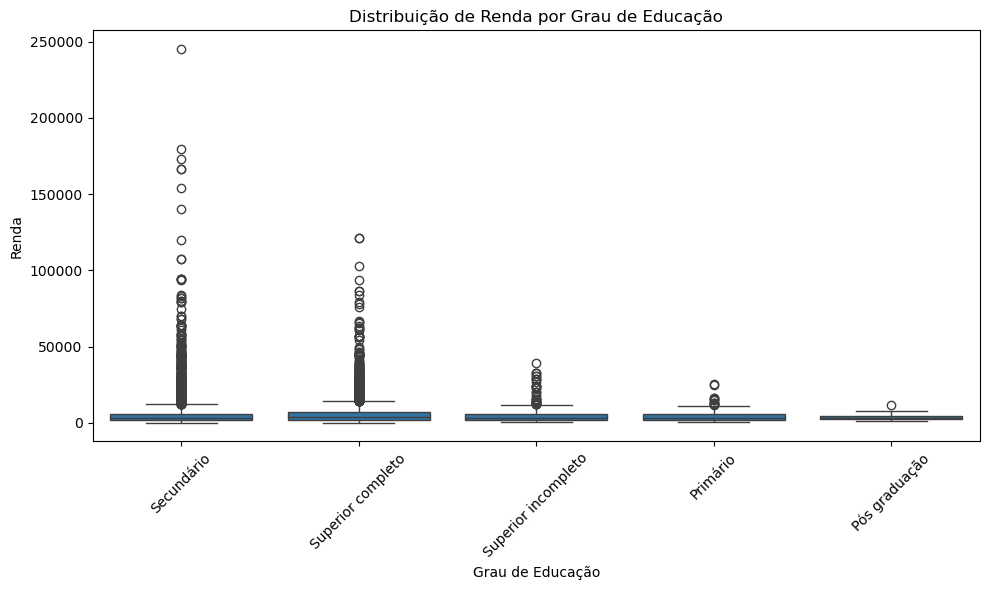

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='educacao', y='renda')
plt.title("Distribuição de Renda por Grau de Educação")
plt.xlabel("Grau de Educação")
plt.ylabel("Renda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Etapa 5 Crisp-DM: Avaliação dos resultados


Utilizando uma Árvore de Decisão Regressora com a variável log_renda como alvo, identificamos que tempo de emprego é o principal fator associado à renda, seguido por sexo, tipo de renda e posse de imóvel. O modelo demonstrou coerência com padrões econômicos reais e permitiu interpretações claras.

O desempenho obtido foi:

RMSE ≈ R$ 6.029

R² ≈ 37%

Os resultados são promissores para aplicações iniciais em crédito, com potencial de refinamento em modelos mais avançados.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.